# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

# 1 diabetic, 0 non-diabetic. Since our aim is to identify diabetic patients, we chose 1 as our target label.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.Outcome.value_counts()

# One of the problems frequently encountered in classification problems is inbalanced data.
# Since the number of observations of the class with a small number is naturally low, the learning
# that the model can make from these observations is generally weaker than the class with a
# large number of observations, and the scores of the relevant class may be lower.

# We will go into the details of the actions that can be taken to correct/balance the scores of the underclassed class below.

# The scores of the class that are low in all inbalanced data will not be bad.
# In some data, the scores of the classes that are low can also be very good.
# Although the data is small, even less data may be sufficient for training, as it describes the class very well.
# In these cases, there is no need to correct/balance the scores of the lesser class.

0    500
1    268
Name: Outcome, dtype: int64

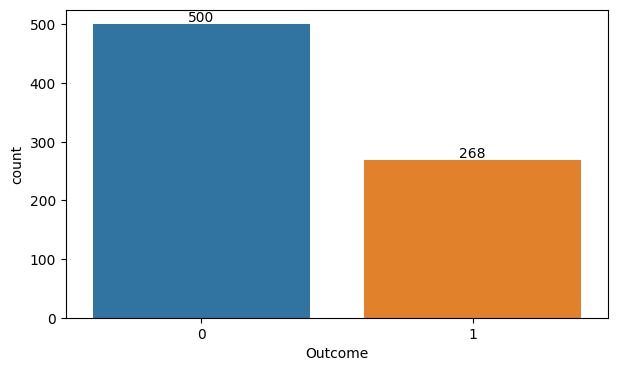

In [8]:
ax = sns.countplot(x='Outcome', data=df)
ax.bar_label(ax.containers[0]);

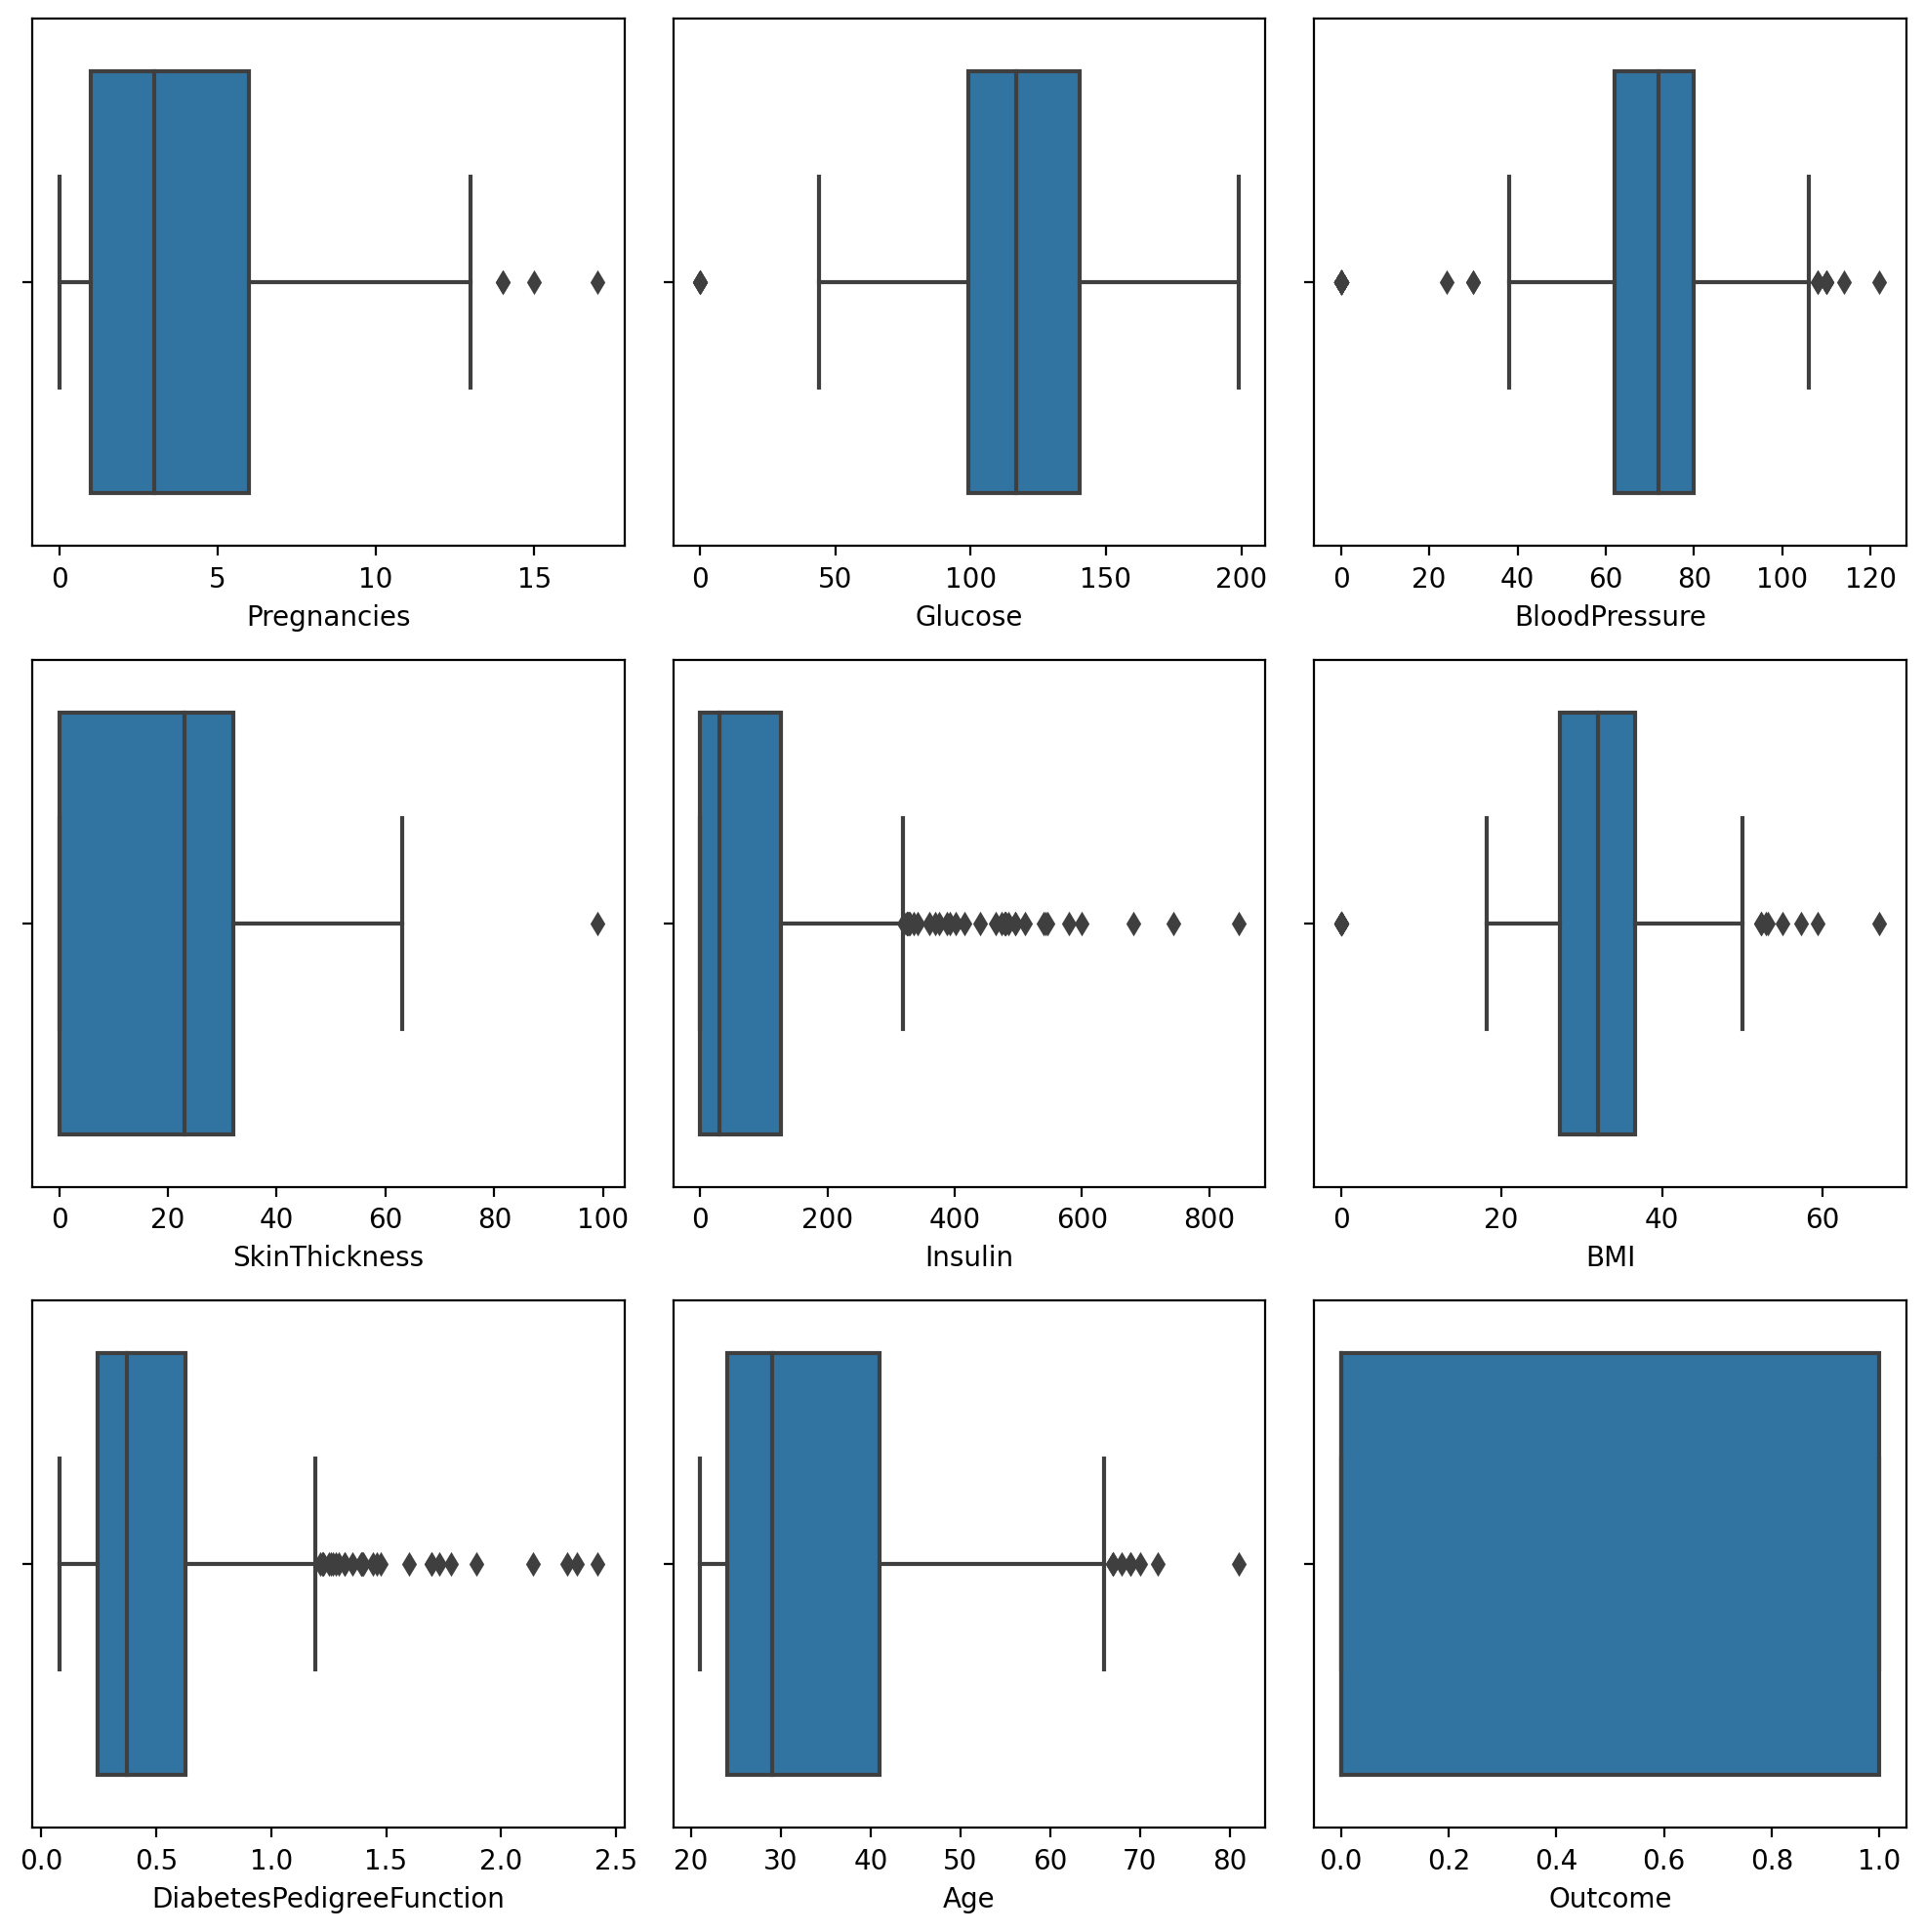

In [9]:
fig = plt.figure(figsize=(10,10), dpi=200)

for i, col in enumerate(df.select_dtypes(["float", "int"]).columns):
        plt.subplot(3,3,i+1)
        ax = sns.boxplot(x=df[col])

plt.tight_layout();

In [10]:
df=df[df.SkinThickness<70]

# Since the skin thickness cannot be over 70mm, we clear the values above 70mm.

In [11]:
df=df[df.Glucose>0]

# Since the glucose value cannot be 0, we clean the values that are zero and small.

In [12]:
df=df[df.BloodPressure>35]

# Since a person's blood pressure cannot fall below 35, we clear values below 35.

In [13]:
df=df[df.BMI>0]

# Since the body mass index cannot be 0, we clear the value of 0.

In [14]:
df.shape  # 768 -->720

(720, 9)

In [15]:
df.Outcome.value_counts()  # 0:500, 1:268

0    473
1    247
Name: Outcome, dtype: int64

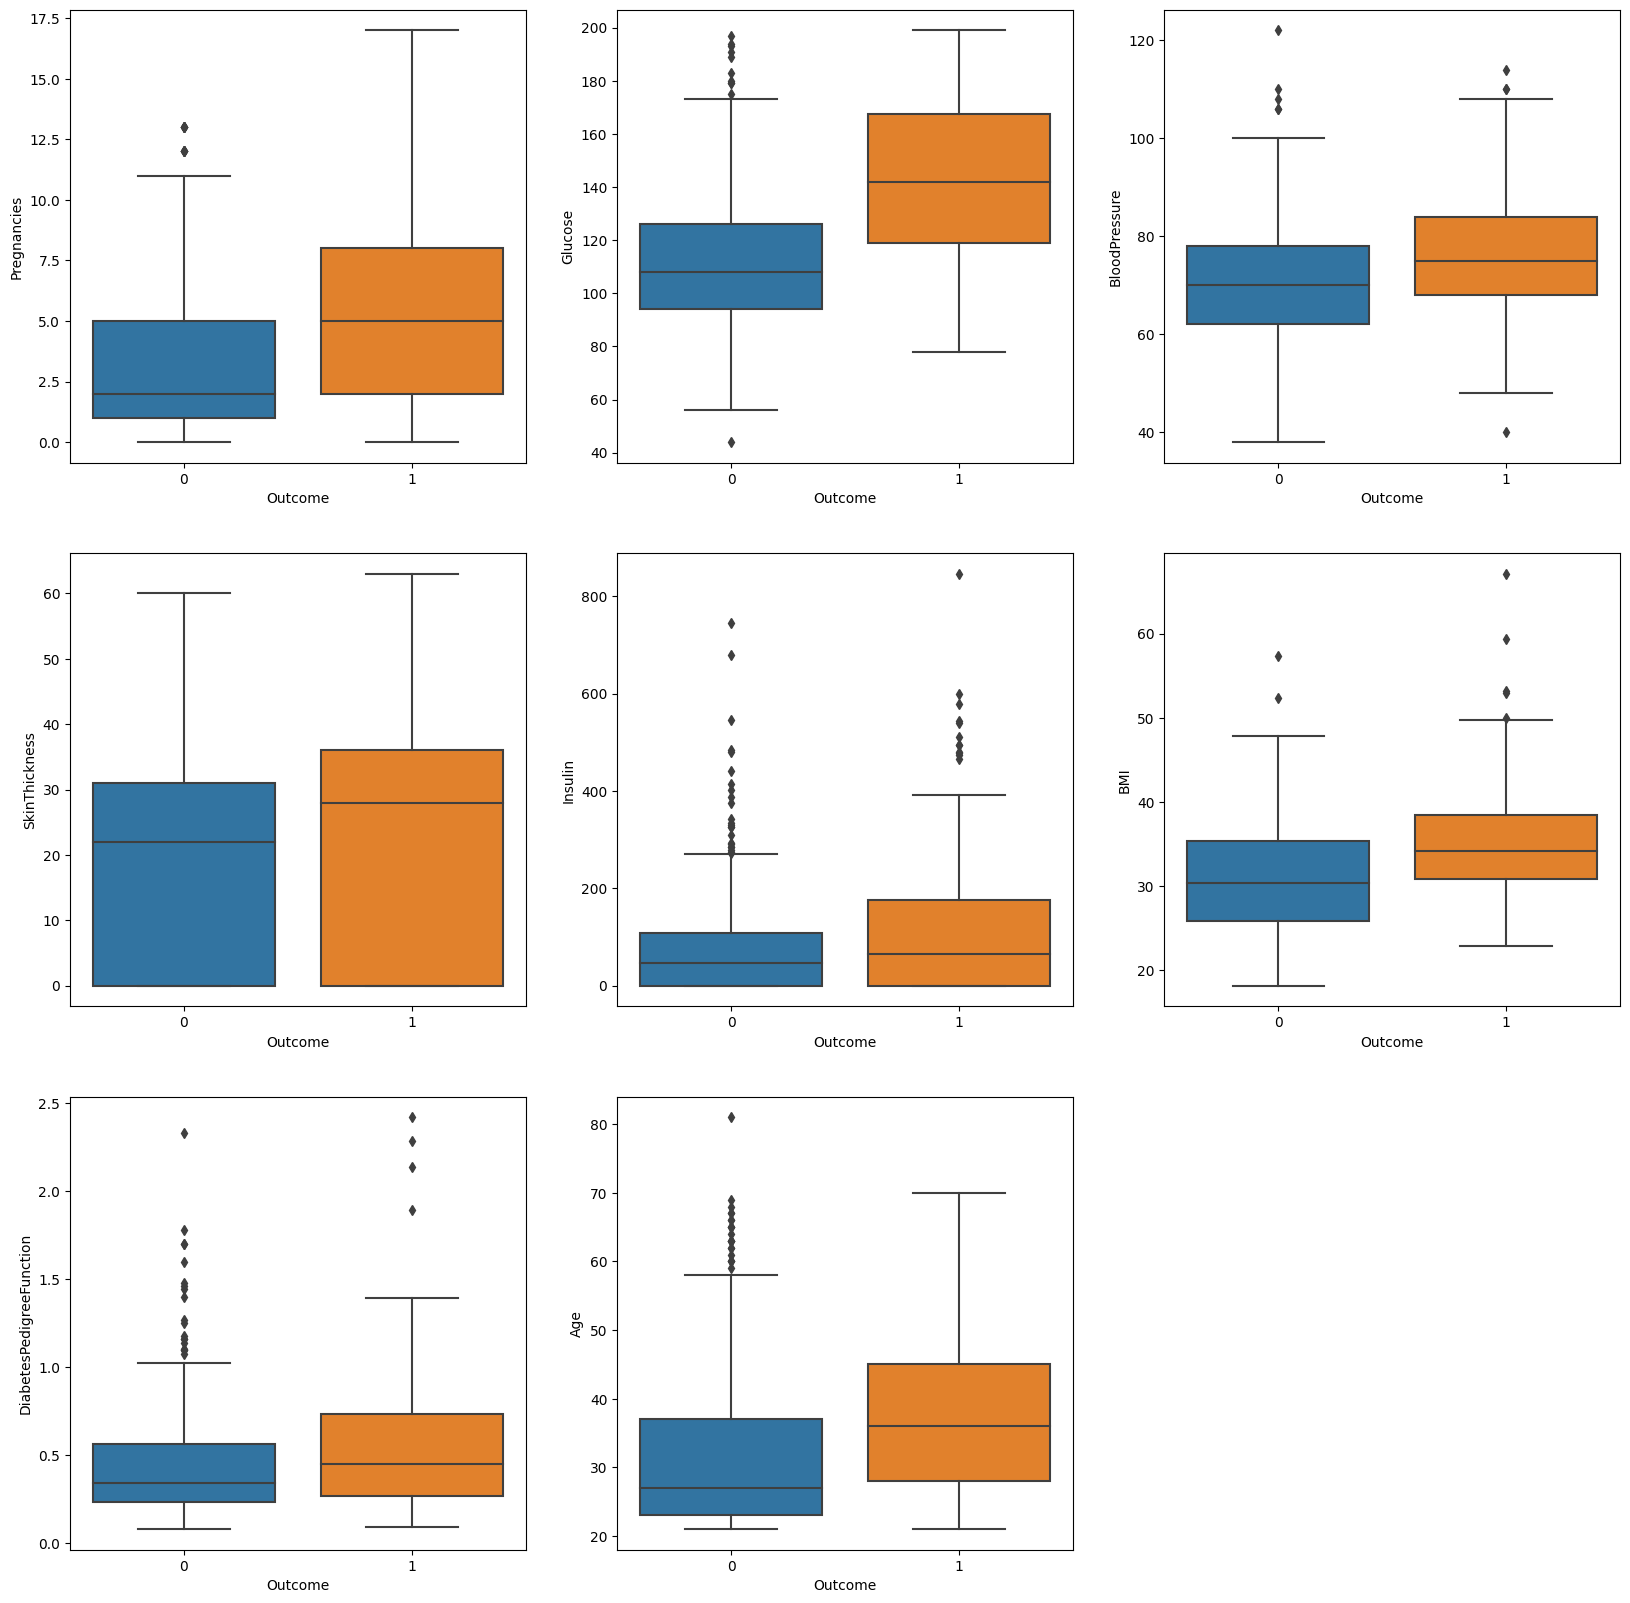

In [16]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature, data=df)

# We look at the boxplots of all invoices according to the target.
# As can be seen in boxplots, we can see that the most distinguishing feature in diabetes is glucose, followed by age.


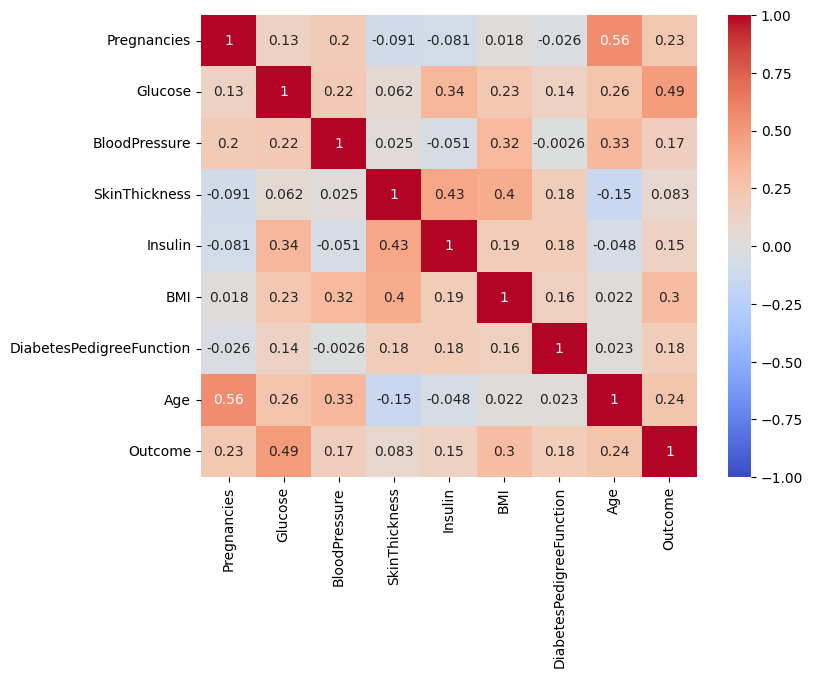

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap="coolwarm");

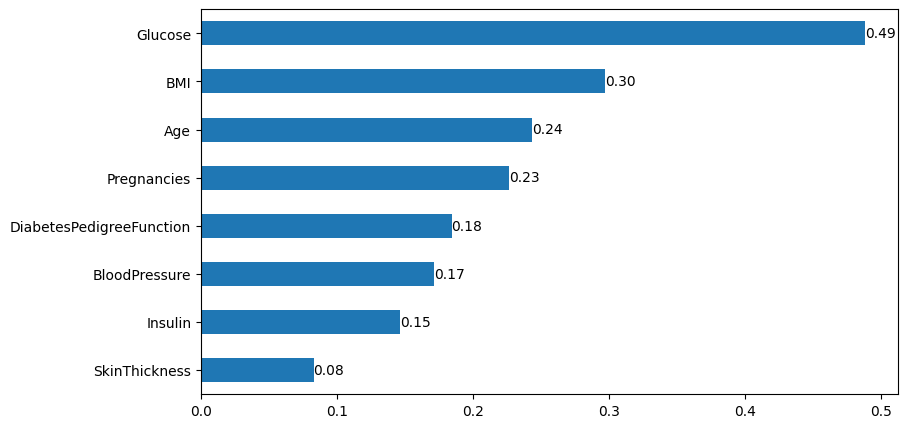

In [18]:
plt.figure(figsize=(9,5))
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

# When we look at the corr, we can see that the featuren that has the highest relationship with the target is glucose.

In [19]:
sns.pairplot(df, hue = "Outcome");

Output hidden; open in https://colab.research.google.com to view.

## Train | Test Split

In [20]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# When separating the classification data into train and test sets, if our data is inbalanced,
# we must use the stratify=y parameter. Stratify parameter maintains the ratio of 0 and 1 classes
# to each other in both train data and test data.

# If this parameter is not used in unbalanced data, it can be distributed unevenly to the less class train or test set.
# This naturally lowers the scores of the inbalanced class.

# Whether your data is balanced or inbalanced, you can use stratify=y on all of them.

In [23]:
print(y.value_counts(normalize=True))
print()
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))

# Distributed targets 80% to the train set and 20% to the test set.

0    0.656944
1    0.343056
Name: Outcome, dtype: float64

0    0.65625
1    0.34375
Name: Outcome, dtype: float64

0    0.659722
1    0.340278
Name: Outcome, dtype: float64


## Modelling with Pipeline

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [26]:
y_pred = pipe_model.predict(X_test)

In [27]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[0.23392748, 0.76607252],
       [0.11962655, 0.88037345],
       [0.5815906 , 0.4184094 ],
       [0.81462769, 0.18537231],
       [0.19171825, 0.80828175],
       [0.91048525, 0.08951475],
       [0.76392155, 0.23607845],
       [0.13938413, 0.86061587],
       [0.97123592, 0.02876408],
       [0.88970359, 0.11029641],
       [0.71503987, 0.28496013],
       [0.7579888 , 0.2420112 ],
       [0.82992689, 0.17007311],
       [0.8125758 , 0.1874242 ],
       [0.09746237, 0.90253763],
       [0.98344195, 0.01655805],
       [0.84873299, 0.15126701],
       [0.3012461 , 0.6987539 ],
       [0.6240152 , 0.3759848 ],
       [0.9273214 , 0.0726786 ],
       [0.54064267, 0.45935733],
       [0.97776597, 0.02223403],
       [0.225094  , 0.774906  ],
       [0.88703843, 0.11296157],
       [0.7614778 , 0.2385222 ],
       [0.69337877, 0.30662123],
       [0.89996383, 0.10003617],
       [0.57200427, 0.42799573],
       [0.7398721 , 0.2601279 ],
       [0.83988274, 0.16011726],
       [0.

In [28]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1] # Probability of belonging to class 1
test_data.sample(10)

# By adding pred and pred_proba featurs to our test data, we observe again how the model does the prediction process.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
655,2,155,52,27,540,38.7,0.240,25,1,0,0.490663
518,13,76,60,0,0,32.8,0.180,41,0,0,0.233246
151,4,114,65,0,0,21.9,0.432,37,0,0,0.123014
508,2,84,50,23,76,30.4,0.968,21,0,0,0.115631
354,3,90,78,0,0,42.7,0.559,21,0,0,0.246884
559,11,85,74,0,0,30.1,0.300,35,0,0,0.183009
691,13,158,114,0,0,42.3,0.257,44,1,1,0.894665
725,4,112,78,40,0,39.4,0.236,38,0,0,0.340930
735,4,95,60,32,0,35.4,0.284,28,0,0,0.187424
492,4,99,68,38,0,32.8,0.145,33,0,0,0.146587


## Model Performance on Classification Tasks

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [31]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# Since the observations of the 1 class are less, we can see that the scores are lower than the 0 class.
#But we do not forget that the scores may not be like this in every inbalanced data.

# We get an insight that there is no overfitting, but we will make our final decision after the CV.

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate

In [32]:
from sklearn.model_selection import cross_validate

In [33]:
from sklearn.model_selection import StratifiedKFold

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10) # In each iteration, divides labels according to their ratio in train and in test sets


scores = cross_validate(model, X_train, y_train,
                        scoring=['precision','recall','f1','accuracy'],  # maximize scores of class 1.
                        cv=cv,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

# The test_precision scores in the 3rd and 4th iterations were much better than the scores in the other iterations,
# but the train_precision scores in the same iterations were similar to the other iterations.
# These situations are often encountered with very small data.

# Normally, more or less the same scores are expected in all iterations.

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.014416,0.020689,0.600000,0.718310,0.450000,0.573034,0.514286,0.637500,0.706897,0.776062
2,0.010972,0.009697,0.642857,0.744526,0.450000,0.573034,0.529412,0.647619,0.724138,0.785714
3,0.012412,0.012336,0.923077,0.717557,0.600000,0.528090,0.727273,0.608414,0.844828,0.766409
4,0.009942,0.010643,0.857143,0.716418,0.600000,0.539326,0.705882,0.615385,0.827586,0.768340
5,0.012924,0.009938,0.705882,0.727941,0.600000,0.556180,0.648649,0.630573,0.775862,0.776062
6,0.010050,0.009580,0.647059,0.727941,0.550000,0.556180,0.594595,0.630573,0.741379,0.776062
7,0.010500,0.010274,0.714286,0.723881,0.526316,0.541899,0.606061,0.619808,0.771930,0.770713
8,0.010964,0.010846,0.647059,0.719424,0.578947,0.558659,0.611111,0.628931,0.754386,0.772640
9,0.012811,0.009530,0.733333,0.698529,0.550000,0.533708,0.628571,0.605096,0.771930,0.761079
10,0.010034,0.010238,0.625000,0.729927,0.500000,0.561798,0.555556,0.634921,0.719298,0.778420


In [34]:
df_scores.mean()[2:]

# We see that there is no overfitting.

test_precision     0.709570
train_precision    0.722445
test_recall        0.540526
train_recall       0.552191
test_f1            0.612139
train_f1           0.625882
test_accuracy      0.763823
train_accuracy     0.773150
dtype: float64

In [35]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# We see that the scores of class 1 in the test data and the CV scores are consistent.

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate for 0 class

In [36]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

# We use the make_scorer function to look at the CV scores of class 0.
# We can write parameters of metric functions in make_scorer into make_scorer.
# We define the metrics that we equate to make_scorer in a dictionary and assign them to a variable (scoring).

In [37]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

# We can get the metric scores of class 0 by giving the scoring variable that we defined above to the scoring parameter.

,fit_time,score_time,test_precision_0,train_precision_0,test_recall_0,train_recall_0,test_f1_0,train_f1_0
1,0.013661,0.011397,0.744186,0.797872,0.842105,0.882353,0.790123,0.837989
2,0.006862,0.005694,0.750000,0.800525,0.868421,0.897059,0.804878,0.846047
3,0.006557,0.006973,0.822222,0.782946,0.973684,0.891176,0.891566,0.833563
4,0.006785,0.005689,0.818182,0.786458,0.947368,0.888235,0.878049,0.834254
5,0.006502,0.005683,0.804878,0.793194,0.868421,0.891176,0.835443,0.839335
6,0.006614,0.005996,0.780488,0.793194,0.842105,0.891176,0.810127,0.839335
7,0.007303,0.007071,0.790698,0.787013,0.894737,0.891176,0.839506,0.835862
8,0.014654,0.010325,0.800000,0.792105,0.842105,0.885294,0.820513,0.836111
9,0.008153,0.006499,0.785714,0.783290,0.891892,0.879765,0.835443,0.828729
10,0.006837,0.005836,0.756098,0.795812,0.837838,0.891496,0.794872,0.840941


In [38]:
df_scores.mean()[2:]
# We see that there is no overfitting.

test_precision_0     0.785247
train_precision_0    0.791241
test_recall_0        0.880868
train_recall_0       0.888891
test_f1_0            0.830052
train_f1_0           0.837217
dtype: float64

In [39]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# We see that it is consistent with the scores of the 0 class in the test set.

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## GridSearchCV

In [40]:
pipe_model.get_params()

# In GridsearchCV, if we are going to use the pipeline model, we can see the list of hyper_parameters of the ML algorithm
# defined in the pipeline with get_params().

# We must give the hyper_parameters in the param_grid parameter of the gridsearchCv as stated below.


{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [41]:
pipe_model.set_params(logistic__C= 1)

# We can use the set_params() function to change any hyperparameter inside the pipeline model.
# In set_params() we write the hyper_parameter we want to change and the value we want to synchronize.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=1))])

In [42]:
pipe_model.get_params()

# We can check the change we made with get_params() again.

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(C=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(C=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

**Logistic Regression :**
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [43]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5]
class_weight= ["balanced", None]

# We can use class_weight="balanced" to balance classes in unbalanced data sets.
# When the data is balanced, the model tries to increase the recall score of that class by
# increasing the precision score of the less class.

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}

grid_model1 = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   # By default, the score of the 1 class is max. it does.
                                                 #0 class that max. f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1,
                          return_train_score=True)

# Since GridsearchCV also performs Cross Validation, we specify return_train_score=True
# to obtain validation and train set scores. (It just returns the metric score we wrote against the scoring)

In [44]:
grid_model1.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [45]:
grid_model1.best_estimator_

# best_estimator_ does not return default hyper_parameters, only those that differ from defaut values.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [46]:
pd.DataFrame(grid_model1.cv_results_).loc[grid_model1.best_index_, ["mean_test_score", "mean_train_score"]]

# The "mean_test_score" and "mean_train_score" of the related df are drawn from the best index and compared,
# and overfitig and underfiting are evaluated.

# Since GridsearchCV also performs Cross validation, we do not need to do extra cross validation.

# The scores we get here are the scores of the scoring metric we put in gridsearchcv.

mean_test_score     0.737895
mean_train_score      0.7514
Name: 17, dtype: object

In [47]:
eval_metric(grid_model1, X_train, y_train, X_test, y_test)

# The gridsearchCV recall score is consistent with the recall scores of the test set.

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

In [48]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

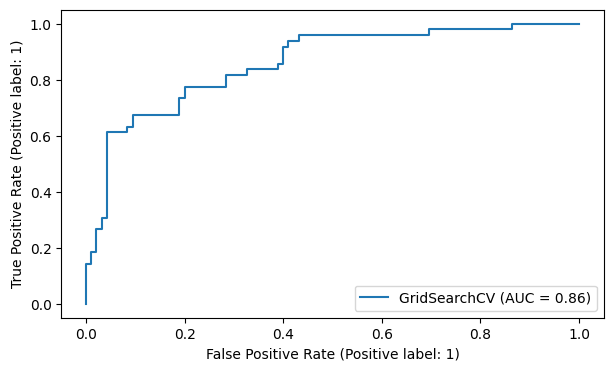

In [49]:
RocCurveDisplay.from_estimator(grid_model1, X_test, y_test);

# Alternative way:
# y_test_pred_proba=grid_model.predict_proba(X_test)[:,1]
# RocCurveDisplay.from_predictions(y_test, y_test_pred_proba, pos_label=1);

## Precision Recall Curve

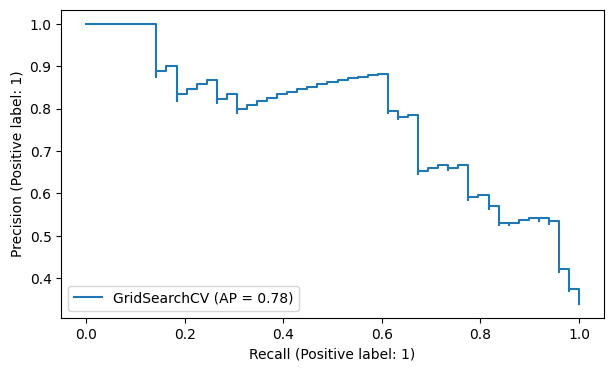

In [50]:
PrecisionRecallDisplay.from_estimator(grid_model1, X_test, y_test);

# alternative way:
# PrecisionRecallDisplay.from_predictions(y_test, y_test_pred_proba);

# Since our data is inbalanced, we consider the average precision score.

## Finding Best Thresholds

In [51]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.0001, 0.01, 0.1, 1]
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__solver":solver}



grid_model2 = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   # By default, the score of the 1 class is max. it does.
                                                 #0 class that max. f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1,
                          return_train_score=True)

In [52]:
grid_model2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.0001, 0.01, 0.1, 1],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [53]:
grid_model2.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [54]:
pd.DataFrame(grid_model2.cv_results_).loc[grid_model2.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.722368
mean_train_score    0.719415
Name: 9, dtype: object

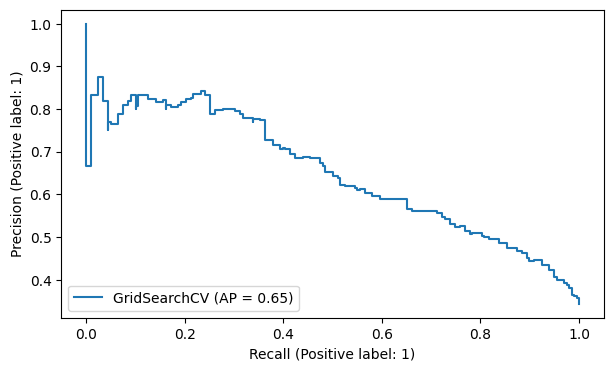

In [55]:
PrecisionRecallDisplay.from_estimator(grid_model2, X_train, y_train);

# We can see at which threshold and which precision and recall scores we can get.

# We do not forget that in order to prevent data leakage, we need to find the best threshold
# corresponding to the metrics we want through the train data.

In [56]:
y_train_pred_proba = grid_model2.predict_proba(X_train) # We determine the treshold over the train data.
average_precision_score(y_train, y_train_pred_proba[:,1])

0.6489129170333268

In [57]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

# precision_recall_curve returns precision, recall, and threshold.

In [58]:
print("precision :", len(precisions))
print("recall    :", len(recalls))
print("threshold :", len(thresholds)) # It does not return a threshold value when threshold is 1.
                                      # But it returns precision and recall for threshold 1.

precision : 127
recall    : 127
threshold : 126


In [59]:
dict = {"precisions":precisions[:-1], "recalls":recalls[:-1], "threshold":thresholds}
df_metric = pd.DataFrame(dict).sort_values(by = ["recalls", "precisions"], ascending=False)
df_metric

# Because precision and recall values are 1 less than the threshold,
# we ignore the last values of precision and recall values.

# We sort the df_metric scores first by recalls and then by precision scores.

# The sorting we have done here also returns the highest precision score that corresponds to the recall score we are targeting.

# Since our target is high recall as possible, we can obtain 1.0 recall with a precision score of max 0.358047.
# Remember that our goal is always to achieve the max recall score with the max precision score.

# Since precission score 0.495522 and recall score 0.838384, '0.481736' is optimal threshold we choose for our context.

,precisions,recalls,threshold
14,0.358047,1.000000,0.427395
13,0.356115,1.000000,0.425717
12,0.354204,1.000000,0.424042
11,0.352941,1.000000,0.422368
10,0.352313,1.000000,0.420697
9,0.351687,1.000000,0.419027
8,0.350442,1.000000,0.417358
7,0.349206,1.000000,0.415692
6,0.347979,1.000000,0.412365
5,0.346760,1.000000,0.407390


In [60]:
optimal_threshold = 0.481736

In [61]:
class_1_proba = grid_model2.predict_proba(X_test)[:,1]
class_1_proba

# After obtaining the probabilities of class 1, we will use the 0.444251 optimal_threshold value
# that we found above instead of 0.5 threshold.

array([0.50058326, 0.62634255, 0.49886918, 0.46123729, 0.60197784,
       0.45273053, 0.4783138 , 0.55351409, 0.45273053, 0.46294152,
       0.46123729, 0.51942839, 0.4697667 , 0.45273053, 0.59538871,
       0.38931682, 0.47318369, 0.56028152, 0.51771667, 0.47318369,
       0.51771667, 0.43243575, 0.58544089, 0.4341193 , 0.45953397,
       0.42907334, 0.4341193 , 0.53992201, 0.49886918, 0.46464662,
       0.43580438, 0.55859166, 0.50058326, 0.42739458, 0.56028152,
       0.43243575, 0.49201353, 0.4578316 , 0.49886918, 0.44425128,
       0.47489315, 0.44933525, 0.41902653, 0.58544089, 0.46294152,
       0.48173648, 0.48516088, 0.59208104, 0.58210898, 0.4766032 ,
       0.41735833, 0.43917895, 0.51942839, 0.40739009, 0.4561302 ,
       0.60361947, 0.49372726, 0.46123729, 0.49886918, 0.50915266,
       0.57709711, 0.53310235, 0.54332641, 0.59868773, 0.61504373,
       0.44763937, 0.42069657, 0.50572526, 0.62794579, 0.41236522,
       0.49886918, 0.41402764, 0.53992201, 0.43580438, 0.52456

In [62]:
y_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba]

# We make class assignments according to the optimal threshold. And we assign these class assignments to y_pred2.

In [63]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[60 35]
 [11 38]]
              precision    recall  f1-score   support

           0       0.85      0.63      0.72        95
           1       0.52      0.78      0.62        49

    accuracy                           0.68       144
   macro avg       0.68      0.70      0.67       144
weighted avg       0.73      0.68      0.69       144



In [64]:
class_1_proba_train = grid_model2.predict_proba(X_train)[:,1]

y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba_train]

print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

# We do the same process in the train set.

[[209 169]
 [ 32 166]]
              precision    recall  f1-score   support

           0       0.87      0.55      0.68       378
           1       0.50      0.84      0.62       198

    accuracy                           0.65       576
   macro avg       0.68      0.70      0.65       576
weighted avg       0.74      0.65      0.66       576



In [65]:
# Cross validation with optimal threshold

from sklearn.model_selection import StratifiedKFold

def CV(n, model, X, y, optimal_threshold=0.5):
    skf = StratifiedKFold(n_splits = n) #shuffle = True, random_state = 42
    scaler = StandardScaler()
    acc_scores = []
    test_pre_scores = []
    test_rec_scores = []
    test_f1_scores  = []

    train_pre_scores = []
    train_rec_scores = []
    train_f1_scores  = []

    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

    for train_index, test_index in skf.split(X, y):

        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = model
        model.fit(X_train, y_train)

        y_pred_proba = model.predict_proba(X_test)[:,1]
        y_pred2 = [1 if i >= optimal_threshold else 0 for i in y_pred_proba]


        y_train_pred_proba = model.predict_proba(X_train)[:,1]
        y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in y_train_pred_proba]

        acc_scores.append(accuracy_score(y_test, y_pred2))

        test_pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        test_rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        test_f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))

        train_pre_scores.append(precision_score(y_train, y_train_pred2, pos_label=1))
        train_rec_scores.append(recall_score(y_train, y_train_pred2, pos_label=1))
        train_f1_scores.append(f1_score(y_train, y_train_pred2, pos_label=1))

    print(f'Accuracy {np.mean(acc_scores)*100:>15,.2f}%  std {np.std(acc_scores)*100:.2f}%\n')

    print(f'Test_Precision-1 {np.mean(test_pre_scores)*100:>7,.2f}%  std {np.std(test_pre_scores)*100:.2f}%')
    print(f'Train_Precision-1 {np.mean(train_pre_scores)*100:>6,.2f}%  std {np.std(train_pre_scores)*100:.2f}%\n')

    print(f'Test_Recall-1 {np.mean(test_rec_scores)*100:>10,.2f}%  std {np.std(test_rec_scores)*100:.2f}%')
    print(f'Train_Recall-1 {np.mean(train_rec_scores)*100:>9,.2f}%  std {np.std(train_rec_scores)*100:.2f}%\n')

    print(f'Test_F1_score-1 {np.mean(test_f1_scores)*100:>8,.2f}%  std {np.std(test_f1_scores)*100:.2f}%')
    print(f'Train_F1_score-1 {np.mean(train_f1_scores)*100:>7,.2f}%  std {np.std(train_f1_scores)*100:.2f}%')

# We use the code we wrote manually for optimal threshold.
# The reason why we look at the standard deviation of the scores together with the scores is
# to see how similar the scores are to each other.

In [66]:
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
CV(10, model, X_train, y_train, optimal_threshold)

Accuracy           58.86%  std 4.02%

Test_Precision-1   45.15%  std 2.86%
Train_Precision-1  45.33%  std 1.85%

Test_Recall-1      89.92%  std 5.90%
Train_Recall-1     90.52%  std 2.11%

Test_F1_score-1    60.05%  std 3.37%
Train_F1_score-1   60.36%  std 1.23%


## Final Model and Model Deployment

In [67]:
operations = [("scaler", StandardScaler()),
 ("logistic", LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

# We build the final model with the best hyper parameters we find.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [68]:
import pickle
pickle.dump(final_model, open("final_pipe_model", 'wb'))

In [69]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [70]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,720.0,3.880556,3.366308,0.000,1.000,3.000,6.0000,17.00
Glucose,720.0,121.897222,30.649311,44.000,100.000,117.000,142.0000,199.00
BloodPressure,720.0,72.588889,12.075234,38.000,64.000,72.000,80.0000,122.00
SkinThickness,720.0,21.287500,15.476731,0.000,0.000,24.000,33.0000,63.00
Insulin,720.0,84.676389,117.276853,0.000,0.000,48.000,132.0000,846.00
BMI,720.0,32.424167,6.842008,18.200,27.475,32.350,36.6000,67.10
DiabetesPedigreeFunction,720.0,0.474885,0.333024,0.078,0.245,0.378,0.6295,2.42
Age,720.0,33.338889,11.737350,21.000,24.000,29.000,41.0000,81.00


In [71]:
my_dict = {"Pregnancies": [3, 6, 5],
           "Glucose": [117, 140, 125],
           "BloodPressure": [72, 80, 79],
           "SkinThickness": [23, 33, 30],
           "Insulin": [48, 132, 100],
           "BMI": [32, 36.5, 34],
           "DiabetesPedigreeFunction": [0.38, 0.63, 0.30],
           "Age": [29, 40, 33]
          }

# We determine 3 observations according to min, max values.

In [72]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.0,0.38,29
1,6,140,80,33,132,36.5,0.63,40
2,5,125,79,30,100,34.0,0.30,33


In [73]:
sample_2 = sample.copy()

In [74]:
new_model.predict(sample)

array([0, 1, 0])

In [75]:
predictions = new_model.predict(sample)
predictions_proba = new_model.predict_proba(sample)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [76]:
optimal_threshold

0.481736

In [77]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.48"] = predictions2
sample

# We can observe the predictions we get according to the default 0.5 threshold and the optimal threshold below.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred_0.50,pred_0.48
0,3,117,72,23,48,32.0,0.38,29,0.466581,0,0
1,6,140,80,33,132,36.5,0.63,40,0.538490,1,1
2,5,125,79,30,100,34.0,0.30,33,0.491588,0,1


## New Predictions for optimal_threshols

In [78]:
def predict(model, X_test, optimal_threshold = 0.481736):

    predict_proba = model.predict_proba(X_test)

    prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba[:,1]]

    return prediction

# We can get predictions with the predict function that we defined for the optimal threshold.

In [79]:
sample_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.0,0.38,29
1,6,140,80,33,132,36.5,0.63,40
2,5,125,79,30,100,34.0,0.30,33


In [80]:
y_pred = predict(final_model, sample_2)
y_pred

[0, 1, 1]